# Heart disease predictor 

<span>The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable, but note that the classes are heavily unbalanced.<span>

<span>In this project we will analyse the different indicators of heart disease and on the basis of these indicators we will develop a machine learning algorithm to predict wether the patient have heart disease or not  <span>

- Lets import some usefull libraries

In [38]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

- let's load the Data set

In [39]:
heart = pd.read_csv("heart.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Exploratory Data Analysis

- It's alwasya a good idea to check the shape of dataset

In [40]:
print("Rows,Columns",heart.shape)

Rows,Columns (319795, 18)


<span>In this data set we have 319795 rows and 18 columns<span>

- Let's check the Null values in data set

In [41]:
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [42]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


- Now we have to check the type of each column

In [43]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [44]:
heart = heart.drop(heart[(heart['MentalHealth']>7) & (heart['PhysicalHealth']>5)].index)

<span>We have 4 numerical columns and 14 catagorical/object columns <span>

In [45]:
# print the names of all features
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

- Seprating the numerical columns from catagorical columns

In [46]:
heart_numerical = heart._get_numeric_data()
heart_numerical.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
5,28.87,6.0,0.0,12.0


In [47]:
heart_categorical = heart.select_dtypes(include=['object'])
heart_categorical.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
5,Yes,Yes,No,No,Yes,Female,75-79,Black,No,No,Fair,No,No,No


In [48]:
heart_categorical = pd.get_dummies(heart_categorical)

In [49]:
heart_categorical=pd.DataFrame

<AxesSubplot:xlabel='BMI', ylabel='Count'>

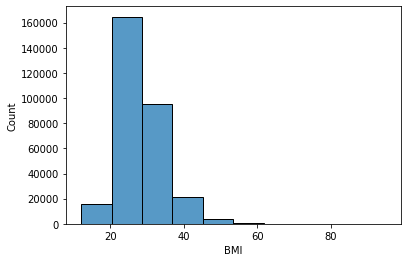

In [50]:
sns.histplot(data = heart_numerical, x="BMI",bins=10)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

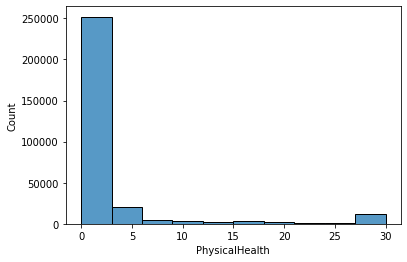

In [51]:
sns.histplot(data = heart_numerical, x="PhysicalHealth",bins=10)

<AxesSubplot:xlabel='MentalHealth', ylabel='Count'>

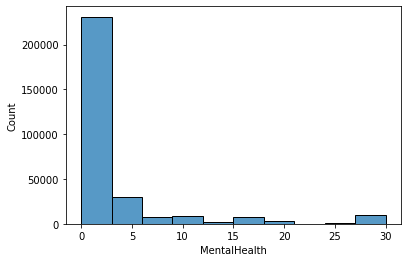

In [52]:
sns.histplot(data = heart_numerical, x="MentalHealth",bins=10)


<AxesSubplot:xlabel='SleepTime', ylabel='Count'>

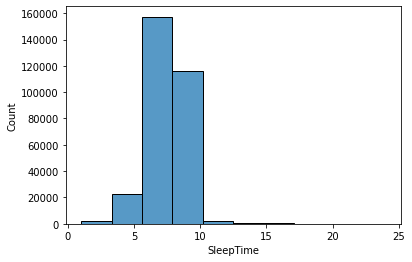

In [53]:
sns.histplot(data = heart_numerical, x="SleepTime",bins=10)

- Checking outliers

<AxesSubplot:ylabel='BMI'>

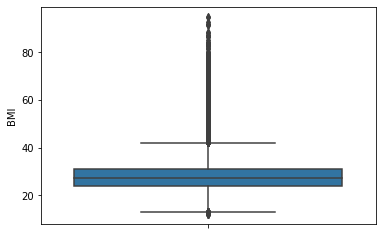

In [54]:
sns.boxplot(y="BMI",data=heart_numerical)

<AxesSubplot:ylabel='PhysicalHealth'>

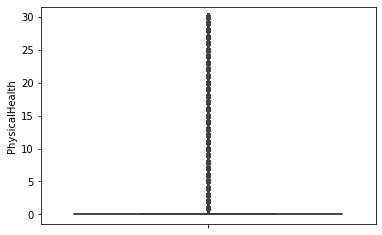

In [55]:
sns.boxplot(y="PhysicalHealth",data=heart_numerical)

<AxesSubplot:ylabel='MentalHealth'>

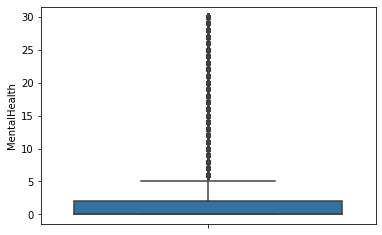

In [56]:
sns.boxplot(y="MentalHealth",data=heart_numerical)

<AxesSubplot:ylabel='SleepTime'>

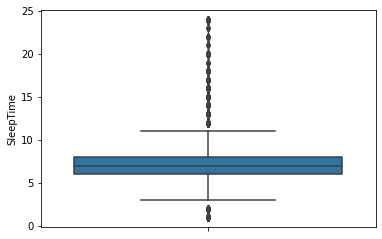

In [57]:
sns.boxplot(y="SleepTime",data=heart_numerical)

In [58]:
heart = heart.drop(heart[(heart['MentalHealth']>7) & (heart['PhysicalHealth']>5)].index)


<AxesSubplot:xlabel='MentalHealth'>

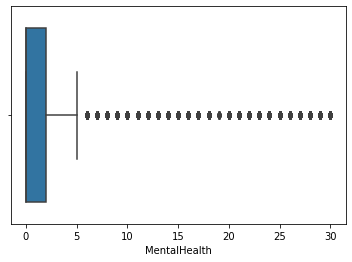

In [59]:
sns.boxplot(x="MentalHealth",data=heart_numerical)

<AxesSubplot:xlabel='PhysicalHealth'>

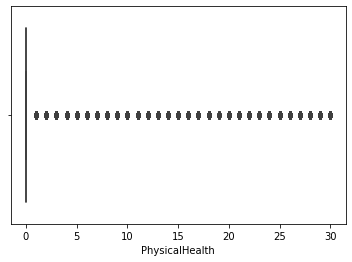

In [60]:
sns.boxplot(x="PhysicalHealth",data=heart_numerical)

<AxesSubplot:>

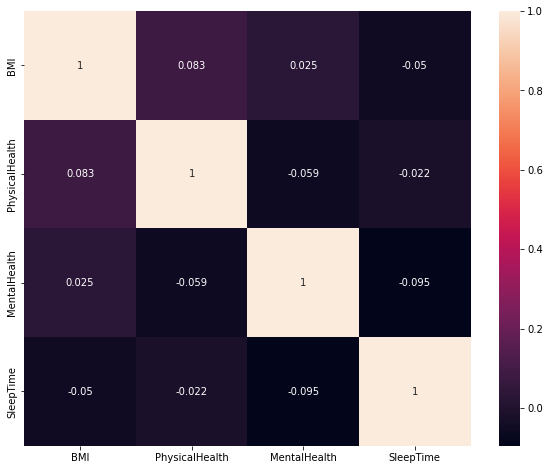

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(heart.corr(), annot=True)

In [62]:
heart.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.083016,0.025389,-0.050295
PhysicalHealth,0.083016,1.000000,-0.058743,-0.021859
MentalHealth,0.025389,-0.058743,1.000000,-0.095314
SleepTime,-0.050295,-0.021859,-0.095314,1.000000


In [63]:
# heart=pd.get_dummies(heart)
# heart.head()

In [64]:
heart.shape

(301843, 18)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
heart_numerical = pd.DataFrame(sc.fit_transform(heart_numerical))
heart_numerical.head()

heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No


In [66]:
y=heart.iloc[ :, 0]
y.head()

0     No
1     No
3     No
4     No
5    Yes
Name: HeartDisease, dtype: object

In [67]:
X = heart.iloc[ : , 1:18]

X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No


In [68]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X = encoder.fit_transform(X)
X = pd.DataFrame(X)

In [69]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,211.0,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,4.0,1.0,0.0,1.0
1,510.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,6.0,0.0,0.0,0.0
2,867.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,5.0,0.0,0.0,1.0
3,822.0,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
4,1290.0,1.0,0.0,0.0,6.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0


# ML Modelling 

In [70]:
# regression pipelines or algos
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics

# root mean squared error
# rms = mean_absolute_error(y_test,y_pred, squared =False)

In [71]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()



In [84]:
# model loop
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

for i in [rf,dt,svc,knn]:  # read all models
    i.fit(X_train,y_train)  # fitting all models
    pred = i.predict(X_test) # predict
    accuracy_score_test= metrics.accuracy_score (y_test,pred) # test score
    accuracy_train_score = metrics.accuracy_score(y_train,i.predict(X_train)) # test score
    if abs(accuracy_train_score-accuracy_score_test) <=0.1:
        print(i)
        print("Accuracy score is: ",metrics.accuracy_score(y_test,pred)) 
        print("Positive Precicion score  is: ",metrics.precision_score(y_test, pred,pos_label="Yes"))
        print("Negative Precicion score  is: ",metrics.precision_score(y_test, pred,pos_label="No"))
        print("Positive recall_score is: ",metrics.recall_score(y_test, pred,pos_label="Yes"))
        print("Negative recall_score is: ",metrics.recall_score(y_test, pred,pos_label="No"))
        print("Positive f1_score is: ",metrics.f1_score(y_test, pred,pos_label="Yes"))
        print("Negative f1_score is: ",metrics.f1_score(y_test, pred,pos_label="No"))
        # print("RMSE is: ",mean_squared_error(y_test,pred, squared = False))
        print("-----------------------------------------")

RandomForestClassifier()
Accuracy score is:  0.9110355261559528
Positive Precicion score  is:  0.32407407407407407
Negative Precicion score  is:  0.9261142889505578
Positive recall_score is:  0.10126756682281621
Negative recall_score is:  0.9815955339456149
Positive f1_score is:  0.15431450766323743
Negative f1_score is:  0.9530481408089521
-----------------------------------------
SVC()
Accuracy score is:  0.9198480447914481


C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Positive Precicion score  is:  0.0
Negative Precicion score  is:  0.9198480447914481
Positive recall_score is:  0.0
Negative recall_score is:  1.0
Positive f1_score is:  0.0
Negative f1_score is:  0.9582508858313009
-----------------------------------------
KNeighborsClassifier()
Accuracy score is:  0.9124269764668206
Positive Precicion score  is:  0.26203966005665724
Negative Precicion score  is:  0.9227291594215905
Positive recall_score is:  0.050978230917608156
Negative recall_score is:  0.987490245512936
Positive f1_score is:  0.0853517877739331
Negative f1_score is:  0.9540119232642836
-----------------------------------------


In [85]:
# model loop
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

for i in [rf,dt,svc,knn]:  # read all models
    i.fit(X_train,y_train)  # fitting all models
    pred = i.predict(X_test) # predict
    accuracy_score_test= metrics.accuracy_score (y_test,pred) # test score
    accuracy_train_score = metrics.accuracy_score(y_train,i.predict(X_train)) # test score
    if abs(accuracy_train_score-accuracy_score_test) <=0.1:
        print(i)
        print("Accuracy score is: ",metrics.accuracy_score(y_test,pred)) 
        print("Positive Precicion score  is: ",metrics.precision_score(y_test, pred,pos_label="Yes"))
        print("Negative Precicion score  is: ",metrics.precision_score(y_test, pred,pos_label="No"))
        print("Positive recall_score is: ",metrics.recall_score(y_test, pred,pos_label="Yes"))
        print("Negative recall_score is: ",metrics.recall_score(y_test, pred,pos_label="No"))
        print("Positive f1_score is: ",metrics.f1_score(y_test, pred,pos_label="Yes"))
        print("Negative f1_score is: ",metrics.f1_score(y_test, pred,pos_label="No"))
        # print("RMSE is: ",mean_squared_error(y_test,pred, squared = False))
        print("-----------------------------------------")

RandomForestClassifier()
Accuracy score is:  0.9113120972684656
Positive Precicion score  is:  0.3308223477715003
Negative Precicion score  is:  0.9270450524023411
Positive recall_score is:  0.10944963655244029
Negative recall_score is:  0.9808114627209562
Positive f1_score is:  0.16448189762796506
Negative f1_score is:  0.9531706463745299
-----------------------------------------
SVC()
Accuracy score is:  0.9202405207970978


C:\Users\FURQAN JAVED\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Positive Precicion score  is:  0.0
Negative Precicion score  is:  0.9202405207970978
Positive recall_score is:  0.0
Negative recall_score is:  1.0
Positive f1_score is:  0.0
Negative f1_score is:  0.9584638078724671
-----------------------------------------
KNeighborsClassifier()
Accuracy score is:  0.913167354105584
Positive Precicion score  is:  0.2801235839340886
Negative Precicion score  is:  0.9235159432977541
Positive recall_score is:  0.05649013499480789
Negative recall_score is:  0.9874176476941354
Positive f1_score is:  0.09402004839267196
Negative f1_score is:  0.9543983575753358
-----------------------------------------


### SO the best algorithem is svc on given data , we will select this and make predcition for our test data

In [89]:
pred1 = svc.predict(X_test)


In [99]:
pred1= pd.DataFrame(pred1)
pred1 = pred1.rename({"0": "Heart Disease"})
pred1

,0
0,No
1,No
2,No
3,No
4,No
...,...
60364,No
60365,No
60366,No
60367,No
